# Insurance data  to analyse



#  Objective of the study

# #1 To find the predictive  varaibles

# #2 Can you accurately predict insurance costs?

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [4]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [25]:
#checking if they are null values
df.isnull().sum() 


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Awesome our data is super clean

# To find the predictive varaibles
 in other words find  the relationship that exist between our independ varaibles and our  target 

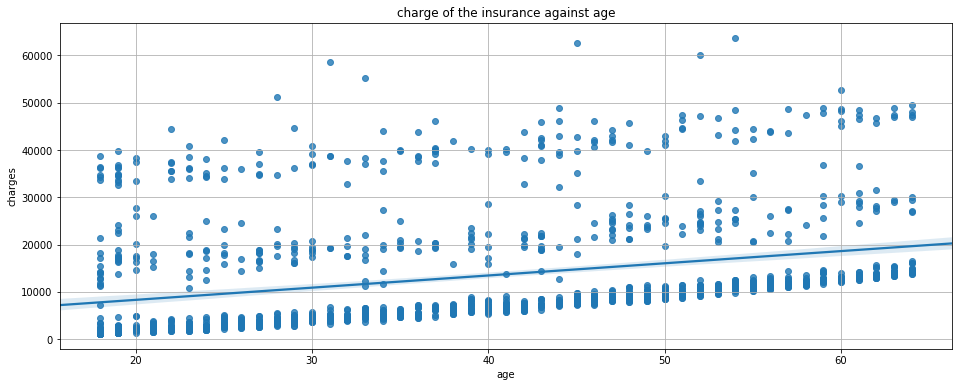

In [9]:
# between age  and the charges
plt.figure(figsize=(16,6))
plt.title("charge of the insurance against age")
sns.regplot(df['age'],df['charges'])
plt.grid()

a person with the highest insurance charges is at 54 years

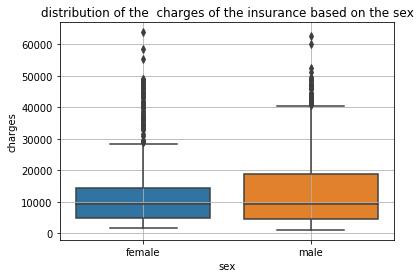

In [11]:
#sex and charges
plt.title("distribution of the  charges of the insurance based on the sex")
sns.boxplot(df['sex'],df['charges'])
plt.grid()

It shows the males have the highest insurance charges

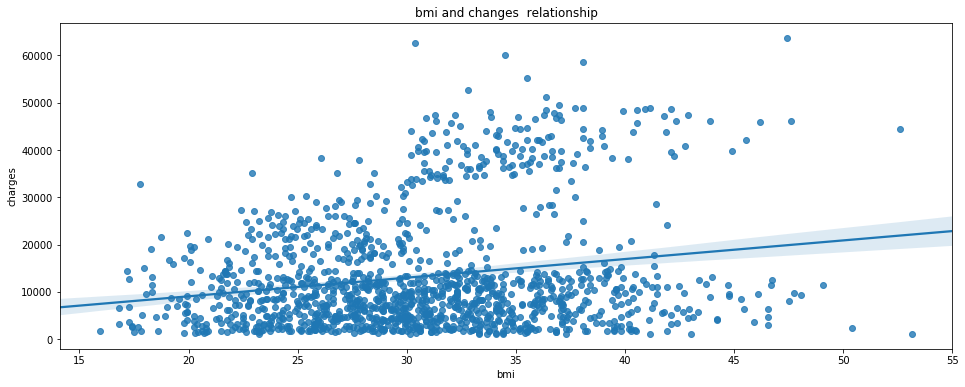

In [34]:
#bmi  and the charges
plt.figure(figsize=(16,6))
plt.title("bmi and changes  relationship")
sns.regplot(df['bmi'],df['charges'])


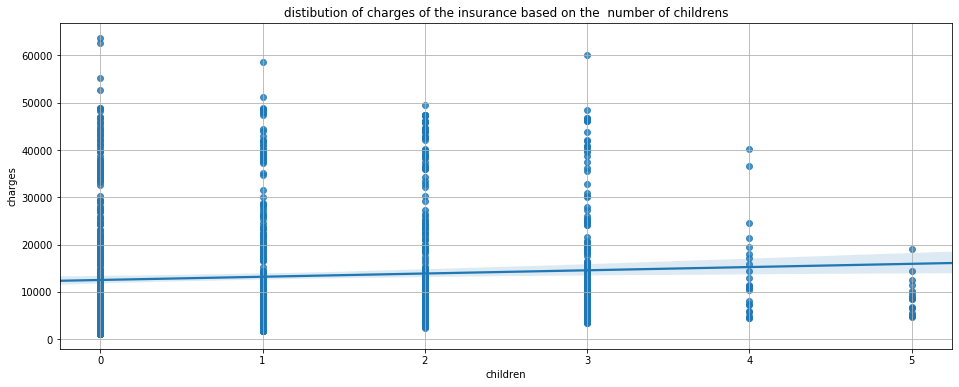

In [13]:
#children and  charges
plt.figure(figsize=(16,6))
plt.grid()
plt.title("distibution of charges of the insurance based on the  number of childrens")
sns.regplot(df['children'],df['charges'])

It show that people with zero kid have the highest charges of insurance while  peope with more kids that is 5 have the lowest  insurance charges followed by 4 children

Text(0.5, 1.0, 'distibution of charges  in relation to the smoking habit')

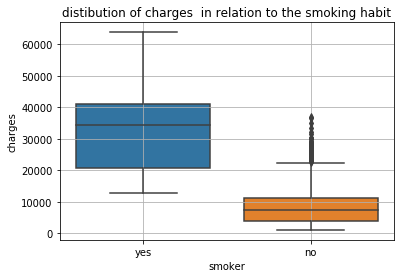

In [17]:
#smoker and charges
sns.boxplot(df['smoker'],df['charges'])
plt.grid()
plt.title("distibution of charges  in relation to the smoking habit")

smokers have a higher charge of the insurance

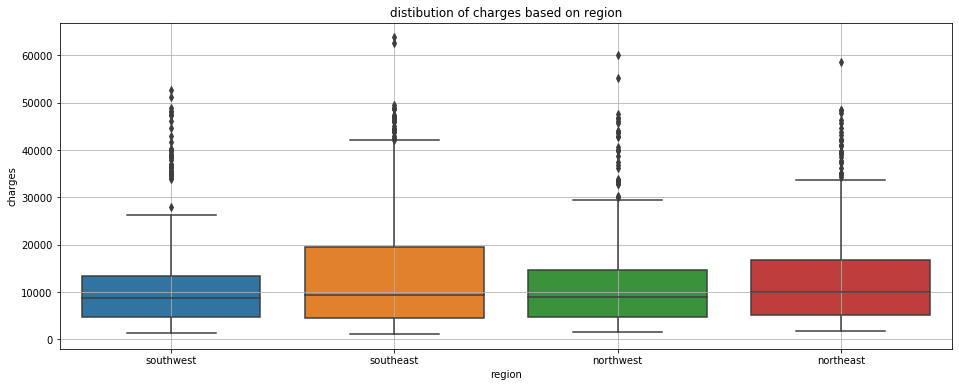

In [22]:
#region and charges

plt.figure(figsize=(16,6))
sns.boxplot(df['region'],df['charges'])
plt.title('distibution of charges based on region')
plt.grid()


south east has the highest charges  for insurance while  southweat had the lowest

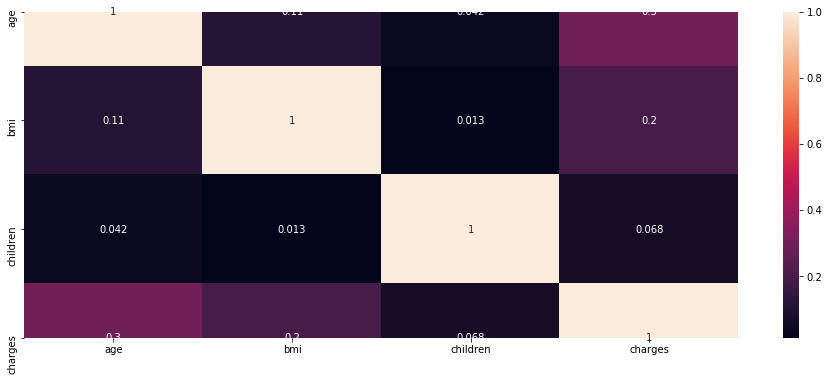

In [28]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True)

FRom the above figure  age, bmi  and number of children  have a impact on the charges of the insurance  hence the most predictive varaibles on the prediction of the insurances charges are age,BMI and teh children

# Can you accurately predict insurance costs

In [145]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [146]:
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# #Multiple linear Regression

In [161]:

#diving data into indendpend varible and the traget variables
x=df.iloc[:,:-1]
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [167]:
y=df.iloc[:,-1]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [168]:
#spliting the data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)

In [169]:
x_train.head()

,age,sex,bmi,children,smoker,region
1130,39,0,23.870,5,0,2
39,60,1,39.900,0,1,3
902,26,1,27.265,3,0,0
729,41,0,36.080,1,0,2
1118,33,1,35.750,1,1,2


In [170]:
y_train.head()

1130     8582.30230
39      48173.36100
902      4661.28635
729      6781.35420
1118    38282.74950
Name: charges, dtype: float64

# feature scaling

In [173]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [175]:
x_train

array([[-0.01679025, -1.00187091, -1.10886921,  3.22869711, -0.50145986,
         0.44715758],
       [ 1.46855153,  0.99813258,  1.53991862, -0.90867523,  1.99417757,
         1.36024652],
       [-0.93628753,  0.99813258, -0.5478814 ,  1.57374817, -0.50145986,
        -1.37902031],
       ...,
       [-0.58263473, -1.00187091,  0.08002838, -0.90867523, -0.50145986,
        -1.37902031],
       [-1.50213202,  0.99813258,  0.18165062,  0.7462737 ,  1.99417757,
         0.44715758],
       [ 0.54905424,  0.99813258,  0.90870405, -0.08120077,  1.99417757,
         0.44715758]])

# linear model training

In [177]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()


In [178]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [179]:
model.coef_

array([3477.2926179 ,  -97.30663068, 1902.62889206,  612.69159748,
       9505.01532316, -432.03840539])

In [180]:
model.intercept_

13128.763458176636

In [183]:
model.predict([[39,0,28.870,5,0,2]])

array([205871.45284646])

In [184]:
model.predict([[60,1,39.900,0,1,3]])

array([305792.80680138])

In [186]:
model.score(x_test,y_test)

0.7493031580280478

# conclusion 

The model has 75% accurancy 